In [ ]:
class Mod3:
  def __init__(self,value):
    self.value=value%3

  def __sum__(self,other):
    return Mod3((self.value+other.value)%3)
  def __mul__(self,other):
    return Mod3((self.value*other.value)%3)

  def __str__(self):
    return f'{self.value} %3'

  def __repr__(self):
    return f'Mod3({self.value})'
  

In [ ]:
state = [0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0]


In [ ]:
import numpy as np

def f(c:np.ndarray,x:np.ndarray):
  c= np.array(c)
  x = np.array(x)
  return np.sum(c*x)%3

class Polynom:
  def __init__(self, coefs):
    self.coefs=np.array(coefs)

  def __call__(self, arg):
    arg=list(arg)
    c=self.coefs
    out = []
    for i in range(len(arg)):
      out.append((arg[i-1]*c[0]+arg[i]*c[1]+arg[(i+1)%len(arg)]*c[2])%3)

    return out

poly1 = Polynom((1,1,1))

In [ ]:
st = state.copy()
out = [st]
for _ in range(20):
  st = poly1(st)
  out.append(st)

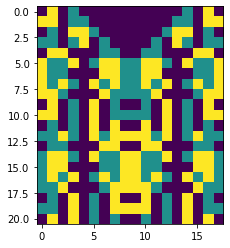

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(out)

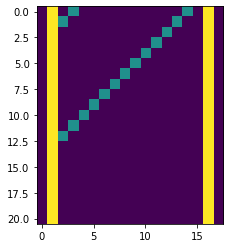

In [ ]:
r10 = [0,0,0,0,0,0,2,2,2,1,1,1,1,1,1,2,2,2,0,0,0,1,1,1,2,2,2]
r12 = [0,1,0,0,1,1,2,2,2,0,1,0,0,1,1,2,2,2,0,1,0,0,1,1,2,2,2]
from itertools import product

# for i,c in enumerate(product(range(3),repeat=3)):
#   print(c,r10[i])

d1 = {c:r10[i] for i,c in enumerate(product(range(3),repeat=3))}
d2 = {c:r12[i] for i,c in enumerate(product(range(3),repeat=3))}


def apply(state,rules):
  out = []
  for i in range(len(state)):
    x = rules.get((state[i-1],state[i],state[(i+1)%len(state)]),0)
    out.append(x)
  return out

st = state.copy()
out=[st]
for _ in range(20):
  st = apply(st,d2)
  out.append(st)

plt.imshow(out)

In [ ]:
d1

{(0, 0, 0): 0,
 (0, 0, 1): 0,
 (0, 0, 2): 0,
 (0, 1, 0): 0,
 (0, 1, 1): 0,
 (0, 1, 2): 0,
 (0, 2, 0): 2,
 (0, 2, 1): 2,
 (0, 2, 2): 2,
 (1, 0, 0): 1,
 (1, 0, 1): 1,
 (1, 0, 2): 1,
 (1, 1, 0): 1,
 (1, 1, 1): 1,
 (1, 1, 2): 1,
 (1, 2, 0): 2,
 (1, 2, 1): 2,
 (1, 2, 2): 2,
 (2, 0, 0): 0,
 (2, 0, 1): 0,
 (2, 0, 2): 0,
 (2, 1, 0): 1,
 (2, 1, 1): 1,
 (2, 1, 2): 1,
 (2, 2, 0): 2,
 (2, 2, 1): 2,
 (2, 2, 2): 2}

In [ ]:
def poly(x1,x2,x3):
  return [x1**a1*x2**a2*x3**a3 %3 for a1,a2,a3 in product(range(3),repeat=3)]


In [ ]:
A = np.array([poly(x1,x2,x3) for x1,x2,x3 in product(range(3),repeat=3)])
A.shape

(27, 27)

In [ ]:
print(A @ A.T %3)


[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1]
 [1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0]
 [1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1]
 [1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1]
 [1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0]
 [1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0]
 [1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0]
 [1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1]
 [1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0]
 [1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1]
 [1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1]
 [1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0]
 [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0]
 [1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0]
 [1 1 0 1 1 0 0 0 0 0 0 0 0 0 0

In [ ]:
B = (np.linalg.inv(A)*(-256)).astype(np.int8)%3

In [ ]:
A_ext = np.hstack([A,np.array(r12).reshape(-1,1)])

In [ ]:
for i in range(26):
  A_ext[i,i]
  for j in range(i+1,27):
    A_ext[j] = (A_ext[j] - A_ext[i]*A_ext[i,i] * A_ext[j,i])%3
print(A_ext)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 2 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 2 

In [ ]:
for i in range(1,27):
  for j in range(i+1,27):
    A_ext[-j] = (A_ext[-j] - A_ext[-i]*A_ext[-i,-i-1] * A_ext[-j,-i-1])%3
print(A_ext)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 

In [ ]:
for i in range(27):
  A_ext[i] = A_ext[i]*A_ext[i,i]%3
print(A_ext)


[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 

In [ ]:
for k in zip(product(range(3),repeat=3),list(A_ext[:,-1])):
  print(k)

((0, 0, 0), 0)
((0, 0, 1), 2)
((0, 0, 2), 2)
((0, 1, 0), 2)
((0, 1, 1), 0)
((0, 1, 2), 2)
((0, 2, 0), 1)
((0, 2, 1), 1)
((0, 2, 2), 0)
((1, 0, 0), 0)
((1, 0, 1), 0)
((1, 0, 2), 0)
((1, 1, 0), 0)
((1, 1, 1), 0)
((1, 1, 2), 0)
((1, 2, 0), 0)
((1, 2, 1), 0)
((1, 2, 2), 0)
((2, 0, 0), 0)
((2, 0, 1), 0)
((2, 0, 2), 0)
((2, 1, 0), 0)
((2, 1, 1), 0)
((2, 1, 2), 0)
((2, 2, 0), 0)
((2, 2, 1), 0)
((2, 2, 2), 0)


In [ ]:
# Задаем четыре правила для конечного автомата
x = [87189642485960958202911070585860771696858196300629529285884717025707245184955461514567350134642761960475397463135221,
     87189642485960958202911070585860771696865629006937516856646420535307083748847009511688466704807114187492178155124653,
     87189642485960958202911070585860771696865758879240222128254776164230511032271591445048493784239863824054082719415381,
     87189642485960958202911070585860771696865758879493973628716181482036815078820525046538331816246773325439025350595533]


In [ ]:
# Переводим правила в векторную форму

f = []
for w in x:
  f.append([])
  while w:
    f[-1].append(w%3)
    w=w//3
print(f)

[[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 

In [ ]:
def poly(x1,x2,x3,x4,x5):
  """Создаем список всех мономов многочлена Жегалкина"""
  return [x1**a1 * x2**a2 * x3**a3 * x4**a4 * x5**a5 %3 for a1,a2,a3,a4,a5 in product(range(3),repeat=5)]

In [ ]:
import numpy as np
from itertools import product

A = np.array([poly(x1,x2,x3,x4,x5) for x1,x2,x3,x4,x5 in product(range(3),repeat=5)])
A.shape

(243, 243)

In [ ]:
A_ext = np.hstack([A,np.array(f[3]).reshape(-1,1)])

In [ ]:
for i in range(242):
  A_ext[i,i]
  for j in range(i+1,243):
    A_ext[j] = (A_ext[j] - A_ext[i]*A_ext[i,i] * A_ext[j,i])%3
print(A_ext)

[[1 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 2 0]]


In [ ]:
for i in range(1,243):
  for j in range(i+1,243):
    A_ext[-j] = (A_ext[-j] - A_ext[-i]*A_ext[-i,-i-1] * A_ext[-j,-i-1])%3
print(A_ext)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]]


In [ ]:
for i in range(243):
  A_ext[i] = A_ext[i]*A_ext[i,i]%3
print(A_ext)


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]]


In [ ]:
A_ext[:,-1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
l = np.array(list(product(range(3),repeat=5)))

In [ ]:
l[A_ext[:,-1]!=0] 

array([[0, 1, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 2, 0, 0, 0],
       [2, 0, 0, 0, 0],
       [2, 1, 0, 0, 0]])

In [ ]:
A_ext[:,-1][A_ext[:,-1]!=0]

array([2, 2, 2, 2, 1, 1])

In [ ]:
def p1(x1,x2,x3,x4,x5):
  return (2*x5+2*x5**2+2*x1+2*x1*x5**2+x1**2+x1**2*x5)%3

def p2(x1,x2,x3,x4,x5):
  return (2*x4+2*x4**2+2*x1+2*x1*x4**2+x1**2+x1**2*x4)%3

def p3(x1,x2,x3,x4,x5):
  return (2*x3+2*x3**2+2*x1+2*x1*x3**2+x1**2+x1**2*x3)%3

def p4(x1,x2,x3,x4,x5):
  return (2*x2+2*x2**2+2*x1+2*x1*x2**2+x1**2+x1**2*x2)%3

In [ ]:
ca = [p1,p2,p3,p4]
state = np.array([[0,0,0,0,0,0,0],[0,2,2,2,2,2,0],[0,2,0,0,0,2,0],[0,2,0,1,0,2,0],[0,2,0,0,0,2,0],[0,2,2,2,2,2,0],[0,0,0,0,0,0,0]])
states = []
for t in range(10):
  states.append(state)
  new_state = np.zeros_like(state)
  for i in range(1,6):
    for j in range(1,6):
      p = ca[((i+j)*2+t)%4]
      new_state[i,j] = p(state[i,j],state[i,j+1],state[i-1,j],state[i,j-1],state[i+1,j])
  state = new_state

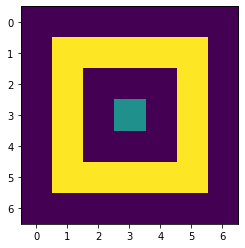

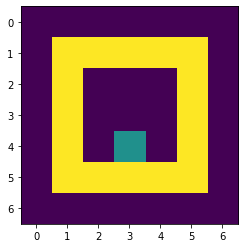

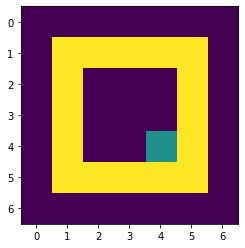

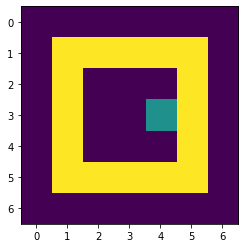

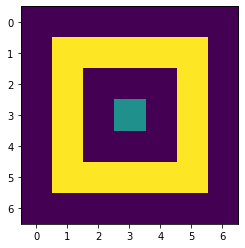

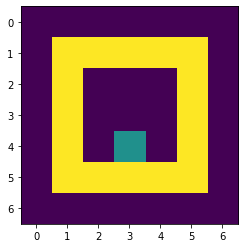

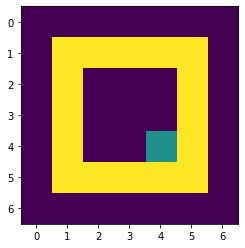

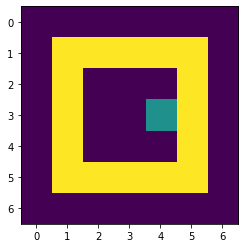

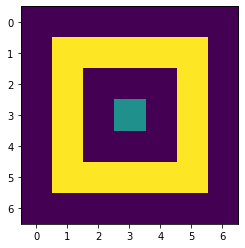

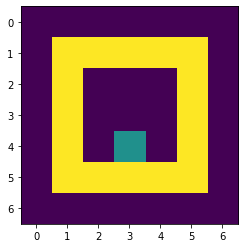

In [ ]:
import matplotlib.pyplot as plt
for state in states:
  plt.figure()
  plt.imshow(state)